<h1 align=center>文本数据清洗2：读取和处理CSV数据</h1>
----
* 作者：吴立宗
* 日期：2016-6-29
* 目标：
 * 学习读取csv格式文件
 * 统一字段名
 * 合并多个年份的数据
 * 输出清洗结果

## 1. 学习使用read_csv 命令
> pandas.read_csv(filepath_or_buffer, sep=', ', delimiter=None, header='infer', names=None, index_col=None, usecols=None, squeeze=False, prefix=None, mangle_dupe_cols=True, dtype=None, engine=None, converters=None, true_values=None, false_values=None, skipinitialspace=False, skiprows=None, skipfooter=None, nrows=None, na_values=None, keep_default_na=True, na_filter=True, verbose=False, skip_blank_lines=True, parse_dates=False, infer_datetime_format=False, keep_date_col=False, date_parser=None, dayfirst=False, iterator=False, chunksize=None, compression='infer', thousands=None, decimal='.', lineterminator=None, quotechar='"', quoting=0, escapechar=None, comment=None, encoding=None, dialect=None, tupleize_cols=False, error_bad_lines=True, warn_bad_lines=True, skip_footer=0, doublequote=True, delim_whitespace=False, as_recarray=False, compact_ints=False, use_unsigned=False, low_memory=True, buffer_lines=None, memory_map=False, float_precision=None)

### 1.1 先读取数据，然后清洗

In [41]:
import pandas as pd
df= pd.read_csv(filename)
df.head()

,ID,DATA_DATE,PRE
0,1,2003/1/1 00:00:00,0.0
1,2,2003/1/2 00:00:00,0.0
2,3,2003/1/3 00:00:00,0.0
3,4,2003/1/4 00:00:00,0.0
4,5,2003/1/5 00:00:00,0.0


### 1.2在读取文件阶段设置读取参数

In [40]:
filename = 'data/DXG_JS2003.csv'
col_name=['ID','Date','Precipitation']
df= pd.read_csv(filename,parse_dates=['Date'],names=col_name,
                index_col='Date',header=1)
df.head()

,ID,Precipitation
Date,,
2003-01-02,2,0.0
2003-01-03,3,0.0
2003-01-04,4,0.0
2003-01-05,5,0.0
2003-01-06,6,0.0


## 2.探索数据

In [ ]:
import pandas as pd
import matplotlib.pylab as plt  
%matplotlib inline 

In [51]:
filename = 'data/DXG_JS2003.csv'
df = pd.read_csv(filename)
df.head()

,ID,DATA_DATE,PRE
0,1,2003/1/1 00:00:00,0.0
1,2,2003/1/2 00:00:00,0.0
2,3,2003/1/3 00:00:00,0.0
3,4,2003/1/4 00:00:00,0.0
4,5,2003/1/5 00:00:00,0.0


* 浏览数据全貌

In [52]:
df.describe()

,ID,PRE
count,365.000000,365.000000
mean,183.000000,1.257534
std,105.510663,3.870994
min,1.000000,0.000000
25%,92.000000,0.000000
50%,183.000000,0.000000
75%,274.000000,0.700000
max,365.000000,40.200000


* 查看数据字段

In [53]:
df.columns

Index(['ID', 'DATA_DATE', 'PRE'], dtype='object')

* 查看数据类型

In [54]:
df.dtypes

ID             int64
DATA_DATE     object
PRE          float64
dtype: object

* 通过画图预览数据

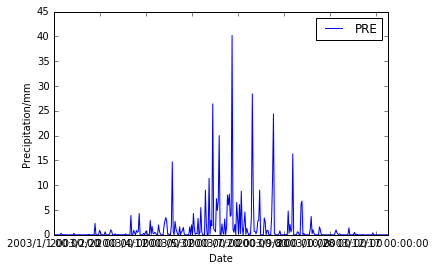

In [55]:
ax = df.plot(x='DATA_DATE',y='PRE',kind='line')
ax.set_xlabel('Date')
ax.set_ylabel('Precipitation/mm')

## 3.清洗一个年份的数据

### 3.1 统一字段名称

In [56]:
col_name=["ID",'Date','Precipitation']
df.columns=col_name
df.head()

,ID,Date,Precipitation
0,1,2003/1/1 00:00:00,0.0
1,2,2003/1/2 00:00:00,0.0
2,3,2003/1/3 00:00:00,0.0
3,4,2003/1/4 00:00:00,0.0
4,5,2003/1/5 00:00:00,0.0


### 3.2更改数据类型

In [57]:
df['Date']=pd.to_datetime(df.Date)
df.dtypes

ID                        int64
Date             datetime64[ns]
Precipitation           float64
dtype: object

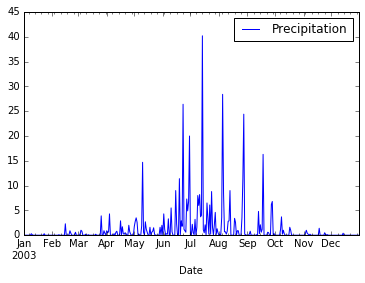

In [34]:
df.plot(x='Date',y='Precipitation')

## 重设数据索引

In [58]:
df_new=df.set_index(['Date'])
df_new.head()

,ID,Precipitation
Date,,
2003-01-01,1,0.0
2003-01-02,2,0.0
2003-01-03,3,0.0
2003-01-04,4,0.0
2003-01-05,5,0.0


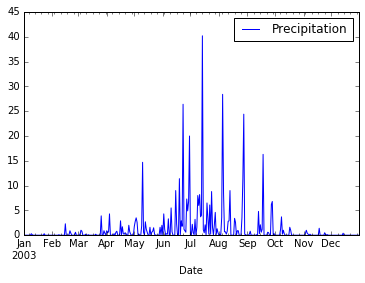

In [60]:
df_new.plot(y='Precipitation')

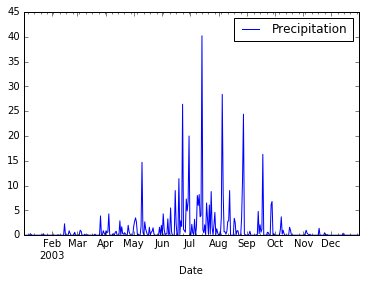

In [53]:
df.plot(y='Precipitation')

## 4.合并多年数据

In [61]:
filename_2003 ='data/DXG_JS2003.csv'
filename_2004 ='data/DXG_JS2004.csv'
filename_2005 ='data/DXG_JS2005.csv'
df_2003= pd.read_csv(filename_2003,parse_dates=['Date'],names=['ID','Date','Precipitation'],\
                index_col='Date',header=1)
df_2004= pd.read_csv(filename_2004,parse_dates=['Date'],names=['ID','Date','Precipitation'],\
                index_col='Date',header=1)
df_2005= pd.read_csv(filename_2005,parse_dates=['Date'],names=['ID','Date','Precipitation'],\
                index_col='Date',header=1)
df_2005.head()


,ID,Precipitation
Date,,
2005-01-02,2,NaN
2005-01-03,3,NaN
2005-01-04,4,NaN
2005-01-05,5,NaN
2005-01-06,6,NaN


### 4.1合并数据

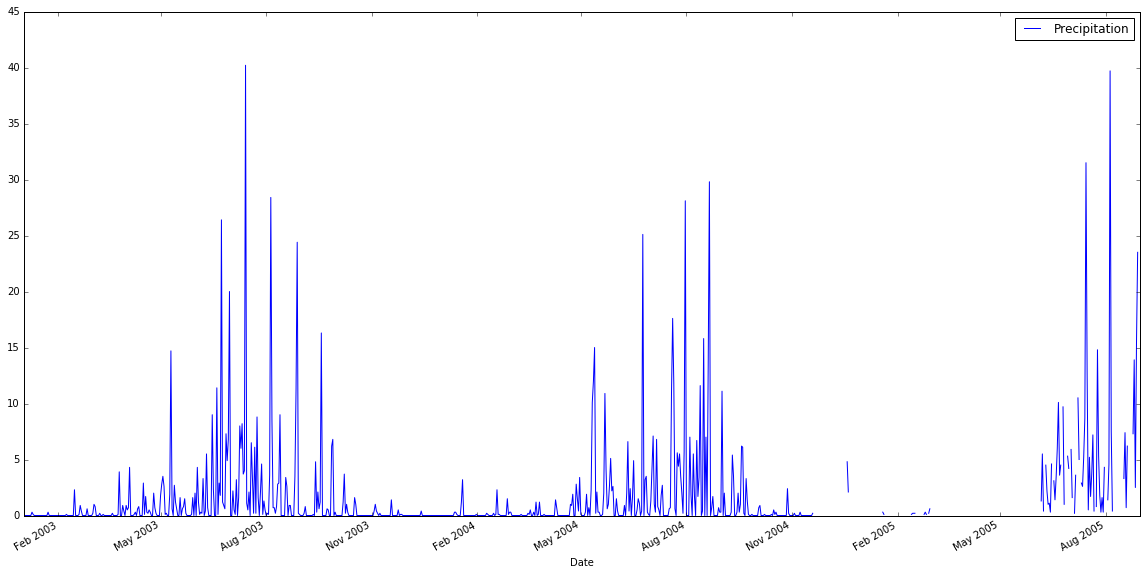

In [66]:
ds = [df_2003, df_2004, df_2005]
df = pd.concat(ds)
df.plot(y='Precipitation',figsize=(20,10))

### 4.2去除无用字段

In [71]:
df_new = df[['Precipitation']]
df_new.head()

,Precipitation
Date,
2003-01-02,0.0
2003-01-03,0.0
2003-01-04,0.0
2003-01-05,0.0
2003-01-06,0.0


## 5.保存清洗结果

In [72]:
df_new.to_csv('data/DXG_JS.csv',index='Date')